In [13]:
%matplotlib inline
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table

import exoplanet as xo

from flareTools import FINDflare

import matplotlib as mpl
mpl.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix',
                            'image.cmap': 'viridis'})

from wotan import flatten

In [3]:
path = '/astro/store/gradscratch/tmp/scw7/tessData/lightcurves/sec7/'

# Flare star candidate that jim picked out
f1 = 'tess2019006130736-s0007-0000000458616184-0131-s_lc.fits'

Text(0, 0.5, 'Flux [e-/s]')

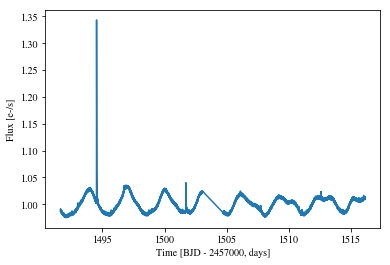

In [4]:
with fits.open(path+f1, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']
    tess_quality = hdulist[1].data['QUALITY']
    
mask = (tess_quality == 0) #& (tess_bjds < 1500)
time = tess_bjds[mask]
flux = pdcsap_fluxes[mask]
median = np.nanmedian(flux)
error = pdcsap_flux_error[mask]

plt.plot(time, flux/median)
plt.xlabel('Time [BJD - 2457000, days]')
plt.ylabel('Flux [e-/s]')

0.5152777777777778


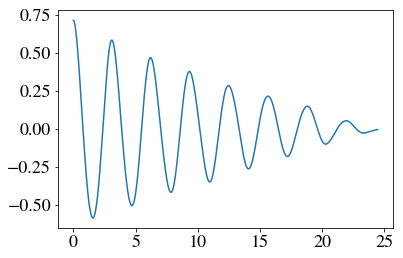

In [26]:
acf = xo.autocorr_estimator(time, flux, yerr=error, min_period=0.1, max_period=27, max_peaks=2)
plt.plot(acf['autocorr'][0], acf['autocorr'][1])
acf_1dt = acf['peaks'][0]['period']
s_window = int(acf_1dt/np.fabs(np.nanmedian(np.diff(time))) / 6)
window_size = (s_window*2/60)/24
print(window_size)

In [27]:
flatten_lc, trend_lc = flatten(
    time,                 # Array of time values
    flux,                 # Array of flux values
    method='biweight',
    window_length=window_size,    # The length of the filter window in units of ``time``
    edge_cutoff=4/24,      # length (in units of time) to be cut off each edge.
    break_tolerance=12/24,  # Split into segments at breaks longer than that
    return_trend=True,    # Return trend and flattened light curve
    cval=5.0              # Tuning parameter for the robust estimators
    )

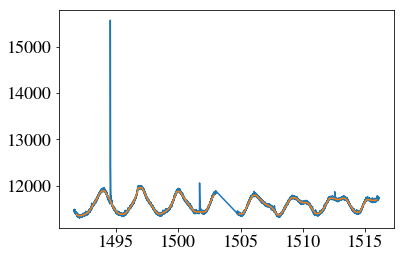

In [28]:
plt.plot(time, flux)
plt.plot(time, trend_lc)

(1494.3, 1494.8)

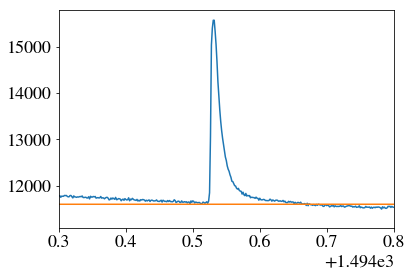

In [17]:
plt.plot(time, flux)
plt.plot(time, trend_lc)
plt.xlim(1494.3, 1494.8)